# Clasificación de las hojas de mango

In [196]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split

## Lectura de los datos

In [117]:
data2 = tf.keras.utils.image_dataset_from_directory("../data/", batch_size=1)

Found 4000 files belonging to 8 classes.


In [139]:
import numpy as np

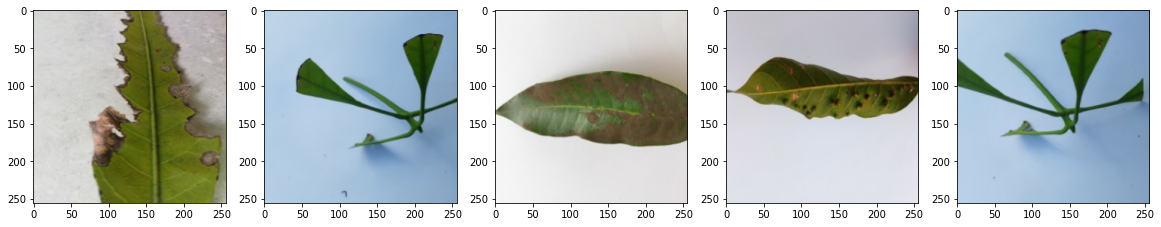

In [182]:
plt.figure(figsize = (20,20))
for i, (imagen, label) in enumerate(data2.take(5)):
    plt.subplot(1,5, i+1)
    plt.imshow(imagen[0]/255)

In [159]:
numbers = ([1,5], [2, 3])
result = map(lambda x:[x[0]+ x[1]] , numbers)
print(list(result))

[[6], [5]]


In [169]:
x = []
y = []

for imagen, etiqueta in data2:
    imagen = tf.reshape(imagen, (256,256,3))
    x.append(imagen)
    y.append(etiqueta)

In [172]:
x = np.array(x)

In [173]:
x.shape

(4000, 256, 256, 3)

In [181]:
y[0]

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([1])>

In [185]:
x[0].shape

(256, 256, 3)

In [188]:
len(np.unique(y))

8

In [190]:
layers_dropout = [keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape = x[0].shape), 
          keras.layers.MaxPooling2D((2,2)),
          keras.layers.Conv2D(64, (3,3), activation = "relu"), 
          keras.layers.MaxPooling2D((2,2)),
          keras.layers.Conv2D(128, (3,3), activation = "relu"), 
          keras.layers.MaxPooling2D((2,2)),
          keras.layers.Dropout(0.5),
          keras.layers.Flatten(),
          keras.layers.Dense(250, activation = "relu"),
          keras.layers.Dense(len(np.unique(y)), "sigmoid")
          ]
layers_nodropout = [keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape = x[0].shape), 
          keras.layers.MaxPooling2D((2,2)),
          keras.layers.Conv2D(64, (3,3), activation = "relu"), 
          keras.layers.MaxPooling2D((2,2)),
          keras.layers.Conv2D(128, (3,3), activation = "relu"), 
          keras.layers.MaxPooling2D((2,2)),
          keras.layers.Flatten(),
          keras.layers.Dense(250, activation = "relu"),
          keras.layers.Dense(len(np.unique(y)), "sigmoid")
          ]

In [192]:
modelo1 = keras.models.Sequential(layers_dropout)
modelo2 = keras.models.Sequential(layers_nodropout)

In [193]:
modelo1.compile(optimizer = "adam", 
                loss = "sparse_categorical_crossentropy", 
                metrics =["accuracy"])
modelo2.compile(optimizer = "adam", 
                loss = "sparse_categorical_crossentropy", 
                metrics =["accuracy"])

In [197]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state=2)

In [ ]:
modelo1.fit(xtrain, ytrain)

In [ ]:
modelo2.fit(xtrain, ytrain)